In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

<img src="input/jerarquico.png">

# Importación de datos

In [76]:
data = pd.read_csv('datos limpios')
data.head()

,Unnamed: 0,DBO5,DEPURADORA,MONTH,NT,PRUEBA,PT,SS,YEAR,DEPURADORA_2,MONTH_2,DATE
0,0,5.0,VIV,enero,15.8,1.0,0.91,5.0,2017.0,0,1,2017-1-1
1,1,5.0,VIV,enero,14.9,2.0,0.84,4.0,2017.0,0,1,2017-1-2
2,2,5.0,VIV,febrero,9.8,1.0,0.63,3.0,2017.0,0,2,2017-2-1
3,3,5.0,VIV,febrero,7.0,2.0,0.67,3.0,2017.0,0,2,2017-2-2
4,4,5.0,VIV,marzo,9.7,1.0,0.85,4.0,2017.0,0,3,2017-3-1


# Tratando datos para el dendograma

In [77]:
data_2=data.drop(columns=['PRUEBA','Unnamed: 0', 'YEAR', 'DEPURADORA','MONTH_2','DATE','MONTH'], axis=1)
data_2.head()

,DBO5,NT,PT,SS,DEPURADORA_2
0,5.0,15.8,0.91,5.0,0
1,5.0,14.9,0.84,4.0,0
2,5.0,9.8,0.63,3.0,0
3,5.0,7.0,0.67,3.0,0
4,5.0,9.7,0.85,4.0,0


In [78]:
data_3=data_2.drop(columns=['DEPURADORA_2'])
data_3.head()

,DBO5,NT,PT,SS
0,5.0,15.8,0.91,5.0
1,5.0,14.9,0.84,4.0
2,5.0,9.8,0.63,3.0
3,5.0,7.0,0.67,3.0
4,5.0,9.7,0.85,4.0


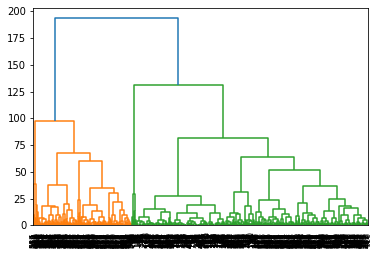

In [79]:
#Se crea una matriz de conexion(usa el método ward  para agrupar los cluster,para realizar
#la agrupación se basa en la distancia Euclidea):

cluster_jerarquico=linkage(data_3, 'ward')
dendrogram(cluster_jerarquico, leaf_rotation=90., leaf_font_size=8.)
plt.show();

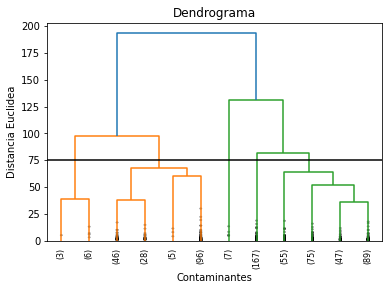

In [80]:
dendrogram(cluster_jerarquico, truncate_mode='lastp', p=12,
           leaf_rotation=90., leaf_font_size=8.,
           show_contracted=True, show_leaf_counts=True)
plt.title('Dendrograma')
plt.xlabel('Contaminantes')
plt.ylabel('Distancia Euclidea')
max_d = 75
plt.axhline(y=max_d, c='k')
plt.show();

El número de cluster,correspondeŕa con el valor medio de la máxima distancia,en este caso sera 75.Se traza una linea horizontal para determinar el número de cluster que hay,que será el número de lineas verticales con el que corte nuestra linea horizontal,en este caso es 5.

In [81]:
hc=AgglomerativeClustering(n_clusters=5,
                          affinity='euclidean',
                          linkage='ward')
y_hc=hc.fit_predict(data_3)

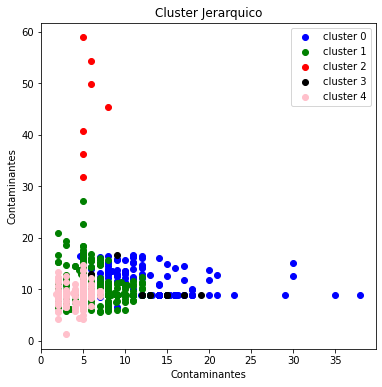

In [86]:
x=data_3.iloc[:, [0, 1, 2, 3]].values
fig=plt.figure(figsize= (6,6))
ax =fig.add_subplot(1, 1, 1)
plt.scatter(x[y_hc==0, 0], x[y_hc==0, 1], c='blue', label='cluster 0')
plt.scatter(x[y_hc==1, 0], x[y_hc==1, 1], c='green', label='cluster 1')
plt.scatter(x[y_hc==2, 0], x[y_hc==2, 1], c='red', label='cluster 2')
plt.scatter(x[y_hc==3, 0], x[y_hc==3, 1], c='black', label='cluster 3')
plt.scatter(x[y_hc==4, 0], x[y_hc==4, 1], c='pink', label='cluster 4')
plt.title("Cluster Jerarquico")
plt.xlabel('Contaminantes')
plt.ylabel('Contaminantes')
plt.legend()
plt.show()



In [70]:
data_2['Cluster']=hc.labels_
data_2.head()

,DBO5,NT,PT,SS,DEPURADORA_2,Cluster
0,5.0,15.8,0.91,5.0,0,1
1,5.0,14.9,0.84,4.0,0,1
2,5.0,9.8,0.63,3.0,0,4
3,5.0,7.0,0.67,3.0,0,4
4,5.0,9.7,0.85,4.0,0,4


In [87]:
data_2.to_csv('jerarquico_cluster')